# Running PySpark #


In [33]:
# Install pyspark. https://medium.com/grabngoinfo/install-pyspark-3-on-google-colab-the-easy-way-577ec4a2bcd8
!pip install pyspark


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

1. Read the given CSV file

In [35]:
# read the BostonHousing.csv
df = spark.read.csv("BostonHousing-1.csv", header=True, inferSchema=True)


2. Show the first 5 elements of your dataset

In [36]:
#show the first 5 rows
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



3. Count number of observation in the given dataset

In [37]:
#show number of records
df.count()


506

In [38]:
#show dimension of the data
print((df.count(), len(df.columns)))

(506, 14)


4. Show the Schema of your dataset

In [39]:
# print the schema
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



5. Drop the column "b" from your dataset

In [40]:
#drop the colum "b"
df1 = df.drop("b")

In [41]:
#show the first 5 rows
df1.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
only showing top 5 rows



6. Round all of the numerical columns into two decimal place

In [42]:
#round all the values to 2 decimal places
from pyspark.sql.functions import round
df2 = df1.select(*(round(df1[c], 2).alias(c) for c in df1.columns))


In [43]:
#show the first 5 rows
df2.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
only showing top 5 rows



7. Create a new column (Age10)  with 10% increasing of 'age' column

In [44]:
#Create a new column (Age10)  with 10% increasing of 'age' column
df3 = df2.withColumn("Age10", df2["age"] * 1.1)

In [45]:
#show the first 5 rows
df3.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|59.620000000000005|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
only showing top 5 rows



8. Plot Age10 column on a 2D Plot

In [46]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\a1324\AppData\Local\Temp\ipykernel_25868\3036679352.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.select("Age10").toPandas(), kde=False, rug=True).set(xlabel='Age10', ylabel='Frequency', title="Histogram of Age10")


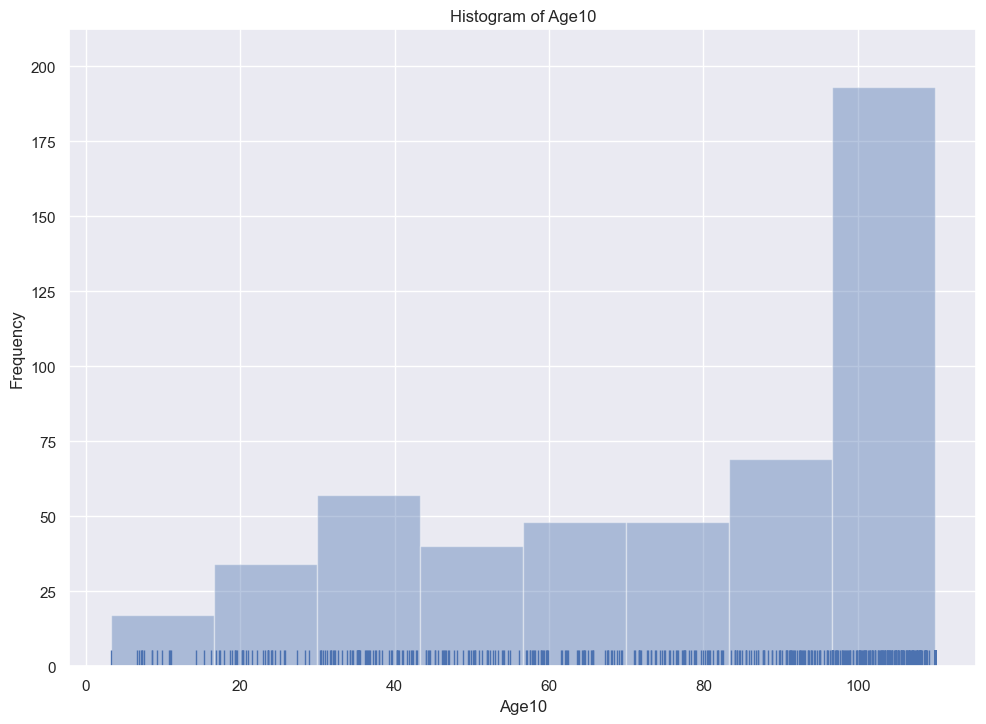

In [47]:
#Plot histogram of Age10 with x-axis label "Age10" and y-axis label "Frequency"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df3.select("Age10").toPandas(), kde=False, rug=True).set(xlabel='Age10', ylabel='Frequency', title="Histogram of Age10")
plt.show()

9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)

In [48]:
#show the summary statistics
df3.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

10. Convert  Spark Dataframe to Pandas Dataframe

In [49]:
#convert the spark dataframe df3 to pandas dataframe
df3.toPandas()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,5.33,36.2,59.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,6.48,22.0,98.23


11. Show the last 5 rows of Pandas DataFrame

In [50]:
#show last 5 rows of df3
df3.tail(5)

[Row(crim=0.06, zn=0.0, indus=11.93, chas=0, nox=0.57, rm=6.59, age=69.1, dis=2.48, rad=1, tax=273, ptratio=21.0, lstat=9.67, medv=22.4, Age10=76.01),
 Row(crim=0.05, zn=0.0, indus=11.93, chas=0, nox=0.57, rm=6.12, age=76.7, dis=2.29, rad=1, tax=273, ptratio=21.0, lstat=9.08, medv=20.6, Age10=84.37),
 Row(crim=0.06, zn=0.0, indus=11.93, chas=0, nox=0.57, rm=6.98, age=91.0, dis=2.17, rad=1, tax=273, ptratio=21.0, lstat=5.64, medv=23.9, Age10=100.10000000000001),
 Row(crim=0.11, zn=0.0, indus=11.93, chas=0, nox=0.57, rm=6.79, age=89.3, dis=2.39, rad=1, tax=273, ptratio=21.0, lstat=6.48, medv=22.0, Age10=98.23),
 Row(crim=0.05, zn=0.0, indus=11.93, chas=0, nox=0.57, rm=6.03, age=80.8, dis=2.51, rad=1, tax=273, ptratio=21.0, lstat=7.88, medv=11.9, Age10=88.88000000000001)]

In [51]:
# spark.stop()